# **Simple Linear Regression**

#### **Objectives**
* Use scikit-learn to implement simple linear regression
* Create, train, and test a linear regression model on real data

---

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Data

In [3]:
# Load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Understand the Data

`FuelConsumption.csv`:
contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source.

* `MODEL YEAR` e.g. 2014
* `MAKE` e.g. VOLVO
* `MODEL` e.g. S60 AWD
* `VEHICLE CLASS` e.g. COMPACT
* `ENGINE SIZE` e.g. 3.0
* `CYLINDERS` e.g 6
* `TRANSMISSION` e.g. AS6
* `FUEL TYPE` e.g. Z
* `FUEL CONSUMPTION` in `CITY(L/100 km)` e.g. 13.2
* `FUEL CONSUMPTION` in `HWY (L/100 km)` e.g. 9.5
* `FUEL CONSUMPTION COMBINED (L/100 km)` e.g. 11.5
* `FUEL CONSUMPTION COMBINED MPG (MPG)` e.g. 25
* `CO2 EMISSIONS (g/km)` e.g. 182

Dataset [link](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

---

#### Explore Data

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


From the data, we can see that most cars (about 75%) have a fuel efficiency between 11 and 31 MPG. However, one car shows a value of 60 MPG, which is much higher than the rest. This could be a valid reading for a highly efficient or hybrid vehicle, or it might be an outlier or a data entry error.

`MODELYEAR` has 0 standard deviation, and thus has no interesting information content.

#### Select Features

Select a few features that might be indicative of CO2 emission to explore more.

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
828,3.0,6,10.2,235
325,3.6,6,15.6,250
202,1.4,4,7.7,177
85,2.0,4,9.1,209
28,3.0,6,11.2,258
438,5.3,8,21.5,344
64,2.0,4,9.1,209
790,1.6,4,7.8,179
669,4.6,8,12.3,283


#### Visualize Features
Consider the histograms for each of these features

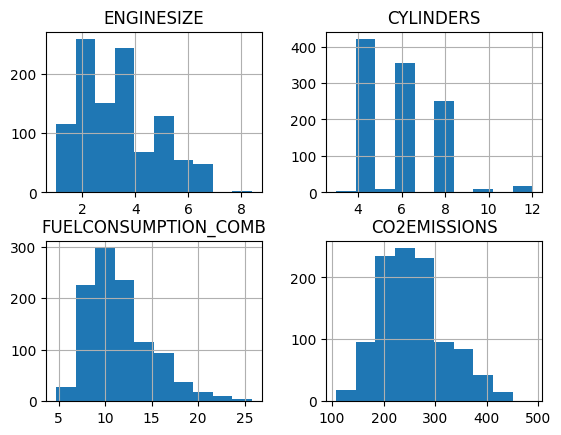

In [6]:
cdf.hist()
plt.show()

* Most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.
* Combined Fuel Consumption and CO2 emission have similar distributions.


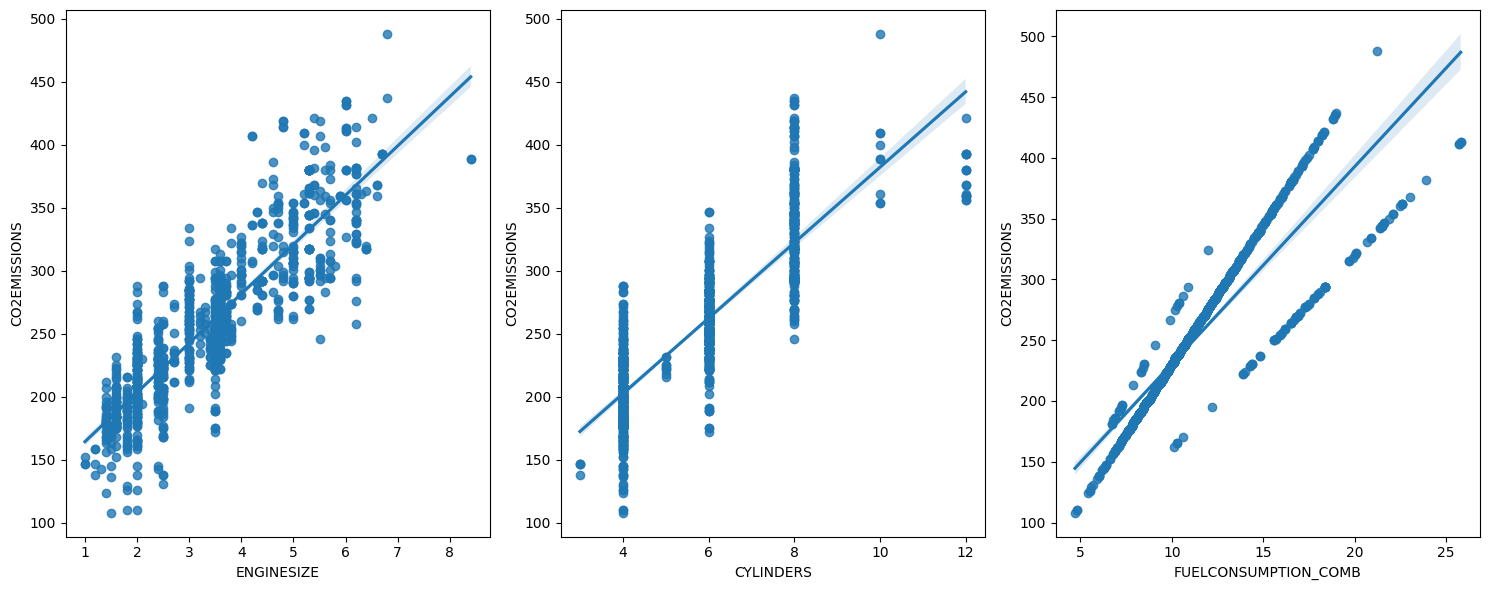

Correlation:


CO2EMISSIONS            1.000000
FUELCONSUMPTION_COMB    0.892129
ENGINESIZE              0.874154
CYLINDERS               0.849685
Name: CO2EMISSIONS, dtype: float64

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax.flatten()

sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=cdf, ax=ax[0])
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=cdf, ax=ax[1])
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=cdf, ax=ax[2])

plt.tight_layout()
plt.show()

corr = cdf.corr()['CO2EMISSIONS'].sort_values(ascending=False)
print(f"Correlation:")
corr

* `FUELCONSUMPTION_COMB`: Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

* `ENGINESIZE`: Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups.

---

#### **Extract the input feature and labels from the dataset**
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, we will use engine size to predict CO2 emission with a linear regression model. We will begin the process by extracting the input feature and target output variables, X and y, from the dataset.

In [16]:
X = cdf.ENGINESIZE.values
y = cdf.CO2EMISSIONS.values

#### **Create train and test datasets**
Next, split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.

Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical testing sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less realibility. Bigger is better when it comes to data.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

The outputs are one-dimensional NumPy arrays or vectors.

#### **Build a simple linear regression model**

In [39]:
from sklearn.linear_model import LinearRegression

# create a model object
lm = LinearRegression()

# train the modelon the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# so we need to reshape it. We can let it infer the number of observations using '-1'.
lm.fit(X_train.reshape(-1,1), y_train)

print(f"Coefficients: {lm.coef_[0]:.4f}")
print(f"Intercept: {lm.intercept_:.4f}")

Coefficients: 38.9930
Intercept: 126.2897


Here, **Coefficients** and **Intercept** are the regression parameters determined by the model.
They define the slope and intercept of the *'best-fit'* line to the training data.

#### **Visualize model outputs**
Visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.

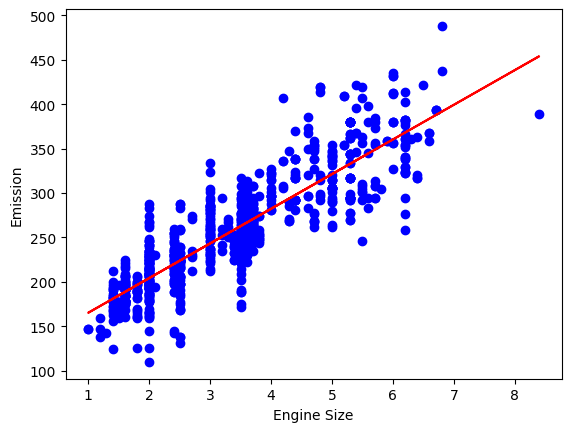

In [51]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lm.coef_ * X_train + lm.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

#### **Model Evaluation**

Compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:
* **Mean Absolute Error**: It is the mean of the absolute value of the erros. This is the easiest of the metrics to understand since it's just an average error.
* **Mean Squared Error (MSE)**: MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.
* **Root Mean Squared Error (RMSE)**: RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.
* **R2-Score** is not error but rather a popular metric used to estimate the performance of you regression model. IT represents how close the data points are to the fitted regression line. The higher the R2-Score value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = lm.predict(X_test.reshape(-1,1))

# Evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"R2-score: {r2_score(y_test, y_pred):.4f}")

Mean Absolute Error: 24.0973
Mean Squared Error: 985.9382
Root Mean Squared Error: 31.3997
R2-score: 0.7616


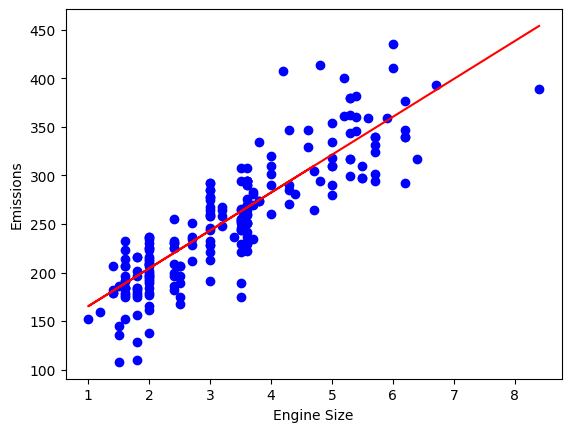

In [ ]:
regression = lm.coef_ * X_test + lm.intercept_

plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, regression, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

---

#### Try using `FUELCONSUMPTION_COMB` feature.

In [57]:
X = cdf.FUELCONSUMPTION_COMB.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm.fit(X_train.reshape(-1,1), y_train)

print(f"Coefficient: {lm.coef_[0]:.2f}")
print(f"Intercept: {lm.intercept_:.2f}")

Coefficient: 16.18
Intercept: 69.10


In [59]:
y_pred = lm.predict(X_test.reshape(-1,1))

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"R2-score: {r2_score(y_test, y_pred):.4f}")

Mean Absolute Error: 20.4419
Mean Squared Error: 797.4346
Root Mean Squared Error: 28.2389
R2-score: 0.8071


* **MSE** is smaller when training using `FUELCONSUMPTION_COMB` rather than `ENGINESIZE`.